<a href="https://colab.research.google.com/github/karomatusiak/pum_projekt/blob/main/Model_podstawowy_jako_wybrany_benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error
import matplotlib.pyplot as plt

In [2]:
# załadowanie danych po preprocessingu
df = pd.read_csv("/content/data_cleaned_reduced.csv")
df.dropna(inplace=True)
df.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.375,0.543210,0.054054,0.603448,0.488987,0.503287,0.623377,0.500000,0.189655,0.666667
1,0.825,0.493827,0.340541,0.620690,0.334802,0.583638,0.571429,0.407407,0.293103,0.666667
2,0.600,0.370370,0.427027,0.758621,0.726872,0.620161,0.480519,0.333333,0.258621,0.666667
3,0.350,0.592593,0.345946,0.534483,0.506608,0.569028,0.467532,0.462963,0.206897,0.666667
4,0.825,0.345679,0.048649,0.517241,0.475771,0.488678,0.519481,0.425926,0.448276,0.666667


In [3]:
# wyświetlenie podstawowych informacji o danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3060 non-null   float64
 1   volatile acidity      3060 non-null   float64
 2   residual sugar        3060 non-null   float64
 3   chlorides             3060 non-null   float64
 4   total sulfur dioxide  3060 non-null   float64
 5   density               3060 non-null   float64
 6   pH                    3060 non-null   float64
 7   sulphates             3060 non-null   float64
 8   alcohol               3060 non-null   float64
 9   quality               3060 non-null   float64
dtypes: float64(10)
memory usage: 239.2 KB


In [4]:
# podział danych na zmienne objaśniające (X) i zmienną objaśnianą (y)
X = df.drop(columns=['quality'])
y = df['quality']

# podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# przygotowanie cech wielomianowych
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [6]:
# dopasowanie modelu regresji wielomianowej stopnia 2
model = LinearRegression()
model.fit(X_train_poly, y_train)

print('Współczynniki: ', model.coef_)
print('Wyraz wolny: ', model.intercept_)

Współczynniki:  [ 2.49353703e-15  6.45389788e-01 -9.36570744e-01  2.26563589e+00
 -1.55095390e-01  1.12732367e-01 -4.25415065e+00  8.14162629e-01
  9.35633777e-01 -1.56149072e+00  1.35203844e-01 -1.02420309e-01
  3.36677300e-01 -6.28970174e-01  7.37282842e-02 -1.23953343e+00
  8.24349307e-01  2.67535618e-01 -7.29354357e-01  4.87819368e-01
 -2.27146919e-01 -2.76842614e-01  3.65032622e-01  1.05927803e-01
  1.99645259e-01 -8.08779326e-02  4.74272488e-01 -3.80792470e-01
 -1.13926945e+00 -9.18709331e-01 -1.17286323e+00  4.61958660e-01
  7.08412547e-01 -1.35383549e+00 -2.07057813e-02 -4.15688709e-01
  2.05756199e+00 -5.76711994e-01  1.58704332e-01  7.59518103e-01
 -6.11441525e-01  1.84514102e+00 -1.14226981e-01 -4.15207902e-01
  6.47868802e-01  2.81620864e+00 -2.18793171e+00 -1.52029729e+00
  3.65639323e+00  4.19668681e-01  5.15360604e-01 -1.23735752e+00
 -7.88677373e-02 -9.67183841e-01  1.07112351e+00]
Wyraz wolny:  1.2717701675244424


In [7]:
# predykcja na danych testowych
y_pred = model.predict(X_test_poly)

# ocena modelu
print("R-squared (R2):", r2_score(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Median Absolute Error (MedAE):", median_absolute_error(y_test, y_pred))

R-squared (R2): 0.3277526995298087
Mean Squared Error (MSE): 0.04178132911238091
Mean Absolute Error (MAE): 0.16373108278095302
Median Absolute Error (MedAE): 0.14278632846957828


1. R-squared (R2): R2 = 0.3277 oznacza, że nasz model regresji wielomianowej stopnia 2 wyjaśnia około 32,77% zmienności w jakości wina na podstawie dostępnych cech.

2. Mean Squared Error (MSE): Średni błąd kwadratowy = 0.0418 oznacza, że nasz model ma stosunkowo niski błąd.

3. Mean Absolute Error (MAE): Średni błąd bezwzględny = 0.1637 oznacza, że średnia bezwzględna różnica między predykcjami a rzeczywistymi wartościami wynosi około 0.1637.

4. Median Absolute Error: Mediana błędu bezwzględnego = 0.1428 to mediana wartości bezwzględnych błędów między predykcjami a rzeczywistymi wartościami.

Zatem nasz model regresji wielomianowej stopnia 2 wydaje się wyjaśniać część wariancji w jakości wina, ale nadal istnieją obszary, które mogą być ulepszone, biorąc pod uwagę średnie błędy i wartości R2.

<ipython-input-8-5c6b527005f5>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Actual')


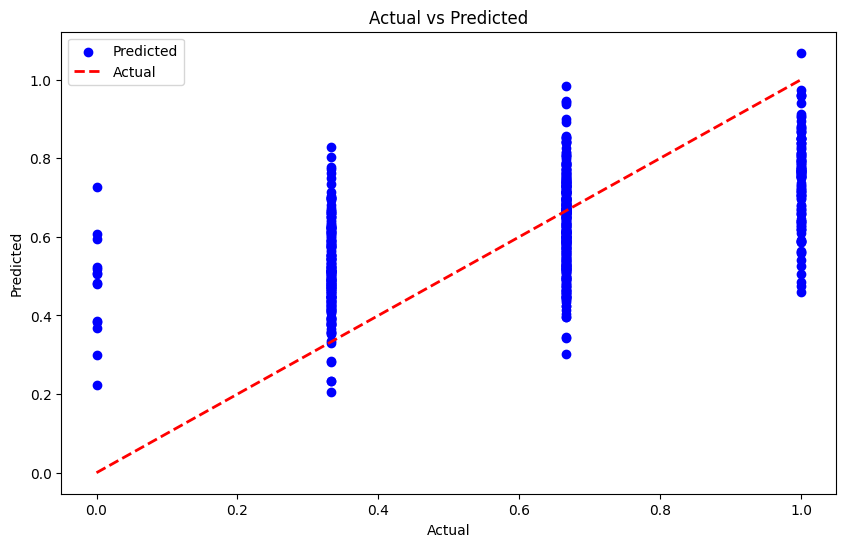

In [8]:
# zwizualizowanie predykcji
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


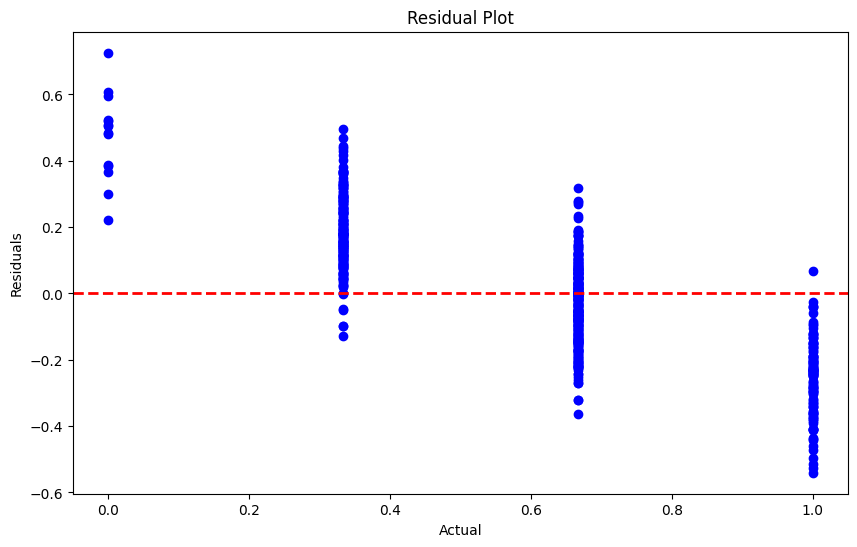

In [9]:
# zwizualizowanie reszt
residuals = y_pred - y_test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

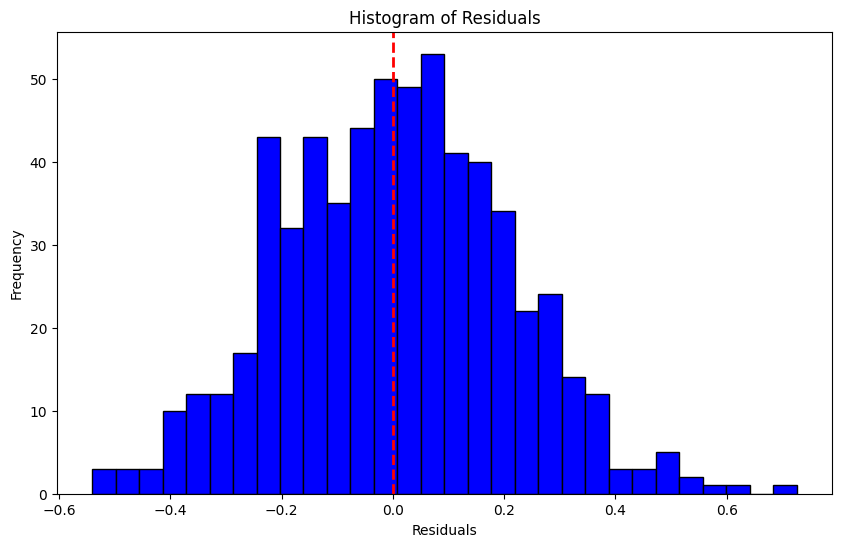

In [10]:
# histogram reszt
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='blue', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', lw=2)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# **Cross validation**

In [11]:
from sklearn.model_selection import cross_val_score

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()

cv_scores = cross_val_score(model, X_poly, y, cv=5, scoring='r2')

print("Cross-validated R^2 scores:", cv_scores)
print("Mean R^2 from CV:", cv_scores.mean())
print("Standard Deviation of R-squared from CV:", cv_scores.std())

Cross-validated R^2 scores: [0.19729017 0.1920371  0.29623817 0.30582293 0.25538134]
Mean R^2 from CV: 0.2493539414415448
Standard Deviation of R-squared from CV: 0.047789253037263155


- **R^2 scores**: [0.197, 0.192, 0.296, 0.306, 0.255]
  
  Wyniki R-squared dla każdego foldu w walidacji krzyżowej wahają się od ok. 0.197 do 0.306, co wskazuje na umiarkowaną zdolność modelu do przewidywania jakości.

- **Średnia wartość R^2**: 0.249

  Średnia wartość R^2 sugeruje, że model wyjaśnia ok. 24.9% zmienności w danych na różnych zbiorach testowych.

- **Odchylenie standardowe R-squared**: 0.048

  Odchylenie standardowe R^2 pokazuje, że wyniki są stosunkowo stabilne między różnymi podzbiorami danych, ale nadal istnieje pewna zmienność.

- **Średni Mean Squared Error (MSE)**: 0.047

 **Odchylenie standardowe MSE**: 0.006

 MSE średnio wynosi ok. 0.047, z niewielkim odchyleniem standardowym, co wskazuje na to, że błędy są dość niskie.